<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/topics/audio_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

In [ ]:
sns.set_theme(style="white")
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle( plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = Path("/content/drive/MyDrive/Colab Notebooks/short-speech")

# List all folders in the specified directory
folders = [f for f in data_path.iterdir() if f.is_dir()]

# Print the list of folders
for folder in folders: # W264sQfgLv0
    print(folder)

/content/drive/MyDrive/Colab Notebooks/short-speech/left
/content/drive/MyDrive/Colab Notebooks/short-speech/yes
/content/drive/MyDrive/Colab Notebooks/short-speech/no
/content/drive/MyDrive/Colab Notebooks/short-speech/go
/content/drive/MyDrive/Colab Notebooks/short-speech/down
/content/drive/MyDrive/Colab Notebooks/short-speech/stop


In [ ]:
# Define the paths to the folders
left_folder_path = "/content/drive/MyDrive/Colab Notebooks/short-speech/left"
yes_folder_path = "/content/drive/MyDrive/Colab Notebooks/short-speech/yes"
no_folder_path = "/content/drive/MyDrive/Colab Notebooks/short-speech/no"
go_folder_path = "/content/drive/MyDrive/Colab Notebooks/short-speech/go"
down_folder_path = "/content/drive/MyDrive/Colab Notebooks/short-speech/down"
stop_folder_path = "/content/drive/MyDrive/Colab Notebooks/short-speech/stop"

# List files in each folder with full paths
left_files = [os.path.join(left_folder_path, f) for f in os.listdir(left_folder_path) if os.path.isfile(os.path.join(left_folder_path, f))]
yes_files = [os.path.join(yes_folder_path, f) for f in os.listdir(yes_folder_path) if os.path.isfile(os.path.join(yes_folder_path, f))]
no_files = [os.path.join(no_folder_path, f) for f in os.listdir(no_folder_path) if os.path.isfile(os.path.join(no_folder_path, f))]
go_files = [os.path.join(go_folder_path, f) for f in os.listdir(go_folder_path) if os.path.isfile(os.path.join(go_folder_path, f))]
down_files = [os.path.join(down_folder_path, f) for f in os.listdir(down_folder_path) if os.path.isfile(os.path.join(down_folder_path, f))]
stop_files = [os.path.join(stop_folder_path, f) for f in os.listdir(stop_folder_path) if os.path.isfile(os.path.join(stop_folder_path, f))]


# Print the list of files for each folder:")
print(left_files)
print(yes_files)
print(no_files)
print(go_files)
print(down_files)
print(stop_files)

['/content/drive/MyDrive/Colab Notebooks/short-speech/left/00b01445_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/left/0d393936_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/left/0b09edd3_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/left/0c2d2ffa_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/left/0c2ca723_nohash_0.wav']
['/content/drive/MyDrive/Colab Notebooks/short-speech/yes/0b40aa8e_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/yes/0c2d2ffa_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/yes/0ac15fe9_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/yes/00f0204f_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/yes/0ab3b47d_nohash_0.wav']
['/content/drive/MyDrive/Colab Notebooks/short-speech/no/0c2ca723_nohash_0.wav', '/content/drive/MyDrive/Colab Notebooks/short-speech/no/0ab3b47d_nohash_0.wav', '/content/drive/MyDriv

In [ ]:
ipd.Audio(yes_files[0])

In [ ]:
ipd.Audio(yes_files[1])

In [ ]:
y , sr = librosa.load(yes_files[1])

print(f"y : {y[:6]}")
print(f"y shape : {y.shape}")
print(f"sr: {sr}")

y : [0.00033828 0.0005944  0.00060302 0.00102196 0.00160965 0.00143598]
y shape : (22050,)
sr: 22050


In [ ]:
pd.Series(y)

,0
0,0.000338
1,0.000594
2,0.000603
3,0.001022
4,0.001610
...,...
22045,-0.000729
22046,-0.001210
22047,-0.001691
22048,-0.001708


In [ ]:
y_trimmed , _ = librosa.effects.trim(y)

The function librosa.effects.trim() is used to trim the leading and trailing silence from an audio signal. Here’s how it affects your data

- **y:** The original audio signal as loaded by librosa.load(). This includes the entire audio waveform, including any silence or noise at the beginning and end of the recording.

- **y_trimmed:** The audio signal after applying librosa.effects.trim(). This version of the audio signal has leading and trailing silence removed, focusing only on the non-silent part of the recording

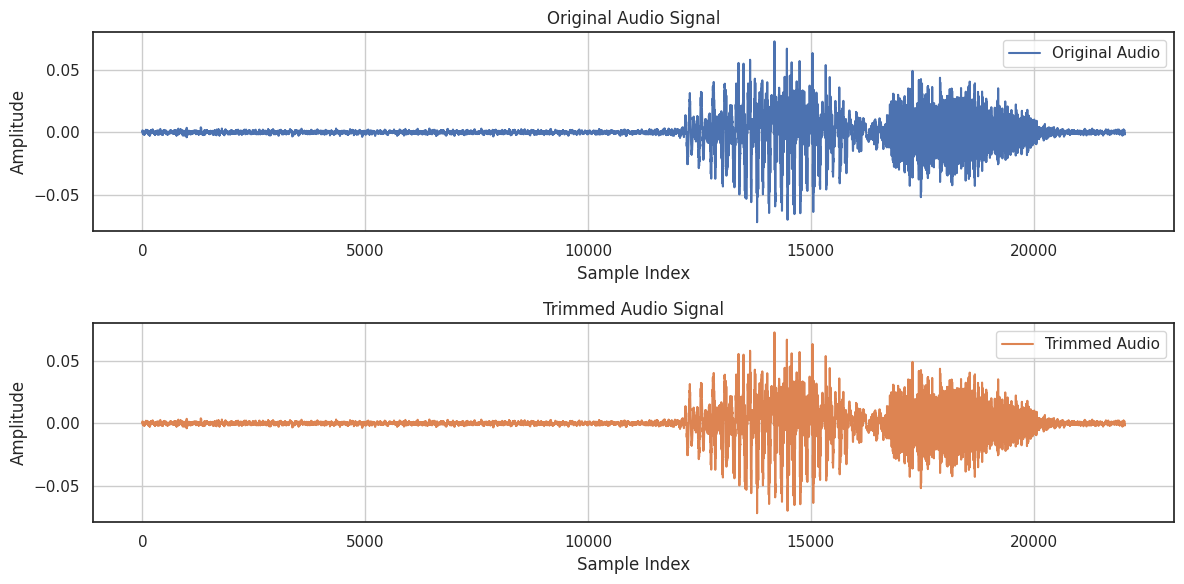

In [ ]:
# Plot the original and trimmed audio signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(y, label='Original Audio')
plt.title('Original Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y_trimmed, label='Trimmed Audio', color=color_pal[1])
plt.title('Trimmed Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_trimmed , _ = librosa.effects.trim(y,top_db=20)

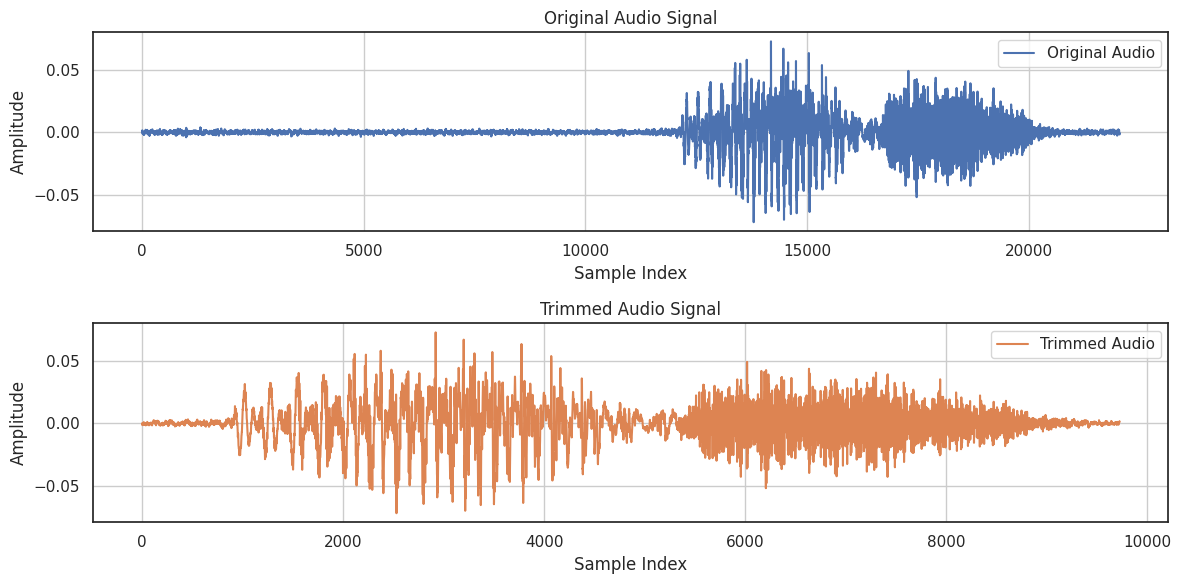

In [ ]:
# Plot the original and trimmed audio signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(y, label='Original Audio')
plt.title('Original Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y_trimmed, label='Trimmed Audio', color=color_pal[1])
plt.title('Trimmed Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

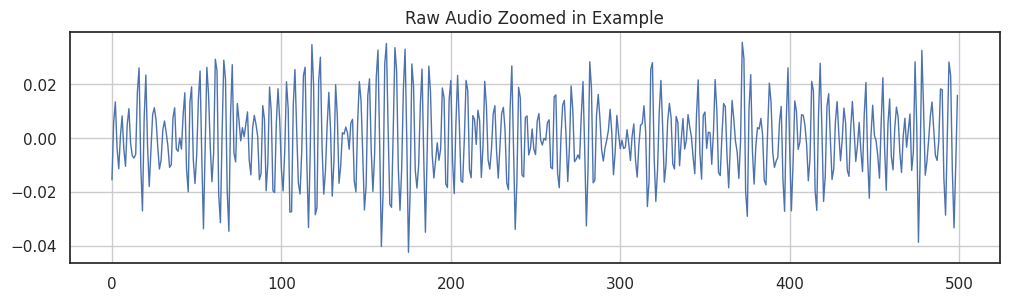

In [ ]:
pd.Series(y[18000:18500]).plot(figsize=(12, 3),lw=1,title="Raw Audio Zoomed in Example",color=color_pal[0])
plt.grid(True)
plt.show()

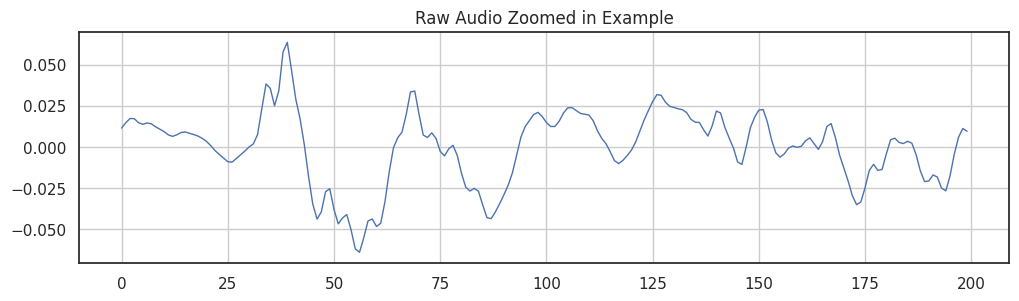

In [ ]:
pd.Series(y[15000:15200]).plot(figsize=(12, 3),lw=1,title="Raw Audio Zoomed in Example",color=color_pal[0])
plt.grid(True)
plt.show()

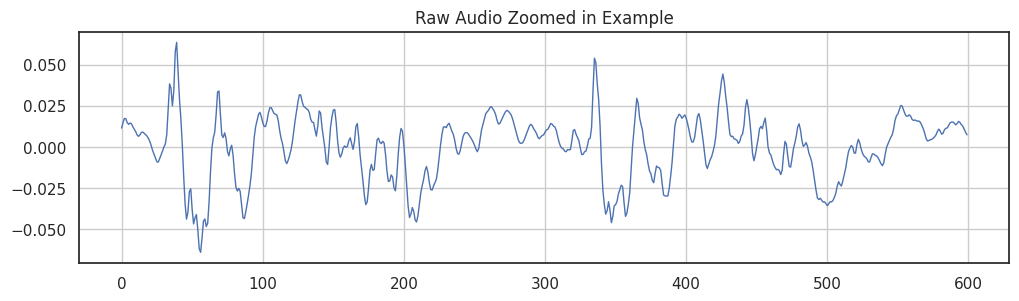

In [ ]:
pd.Series(y[15000:15600]).plot(figsize=(12, 3),lw=1,title="Raw Audio Zoomed in Example",color=color_pal[0])
plt.grid(True)
plt.show()

In [ ]:
# Compute the STFT
D = librosa.stft(y)
# Convert to Decibels (log scale)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [ ]:
D_db.shape

(1025, 44)

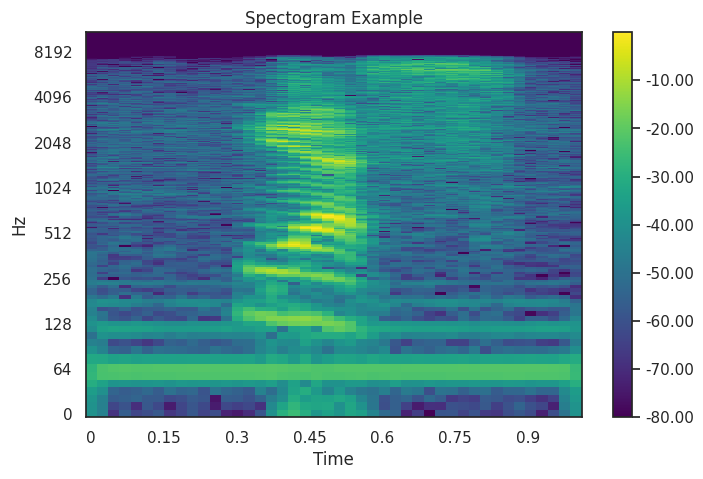

In [ ]:
fig , ax = plt.subplots(figsize=(8,5))
img = librosa.display.specshow(
    D_db,
    x_axis = "time",
    y_axis = "log",
    ax = ax,
    cmap="viridis"
)
ax.set_title('Spectogram Example')
fig.colorbar(img,ax=ax,format=f"%0.2f")
plt.show()

In [ ]:
def display_wave(path,key):
   y , sr = librosa.load(path)
   D = librosa.stft(y)
   D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
   fig , ax = plt.subplots(figsize=(10,5))
   img = librosa.display.specshow(D_db,x_axis = "time",y_axis = "log",ax = ax,cmap="viridis")
   ax.set_title(f'Spectogram > {key}')
   fig.colorbar(img,ax=ax,format=f"%0.2f")
   plt.show()

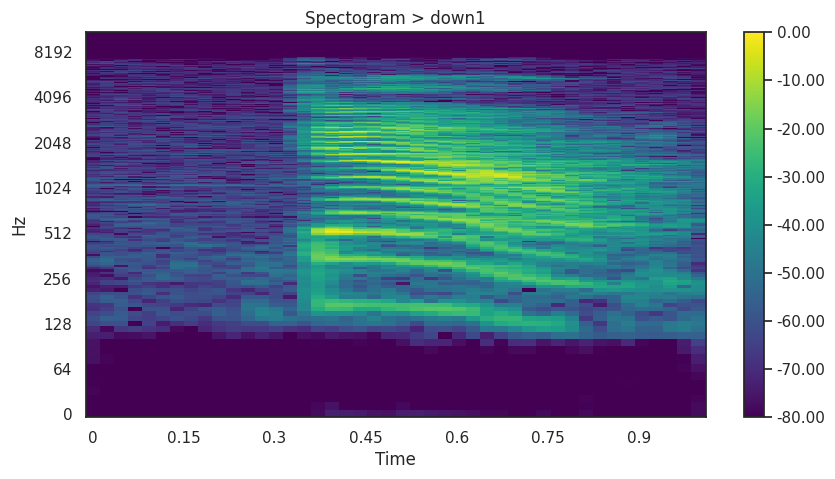

In [ ]:
display_wave("/content/drive/MyDrive/Colab Notebooks/short-speech/down/00b01445_nohash_1.wav","down1")

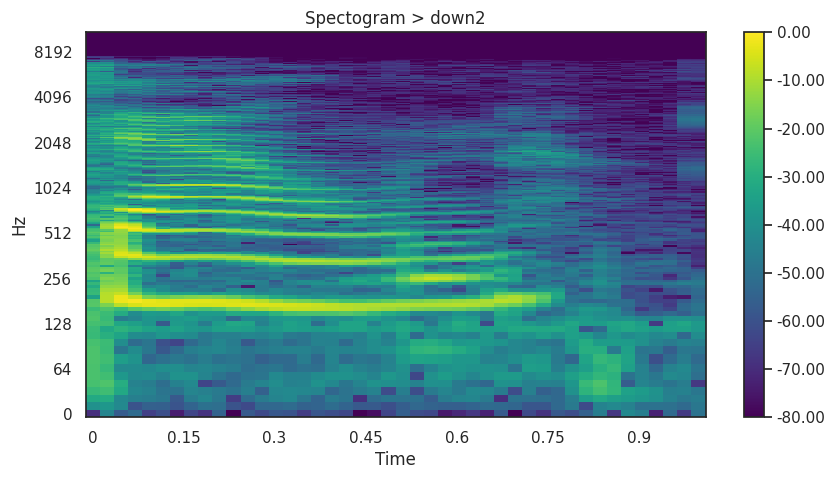

In [ ]:
display_wave("/content/drive/MyDrive/Colab Notebooks/short-speech/down/00f0204f_nohash_0.wav","down2")

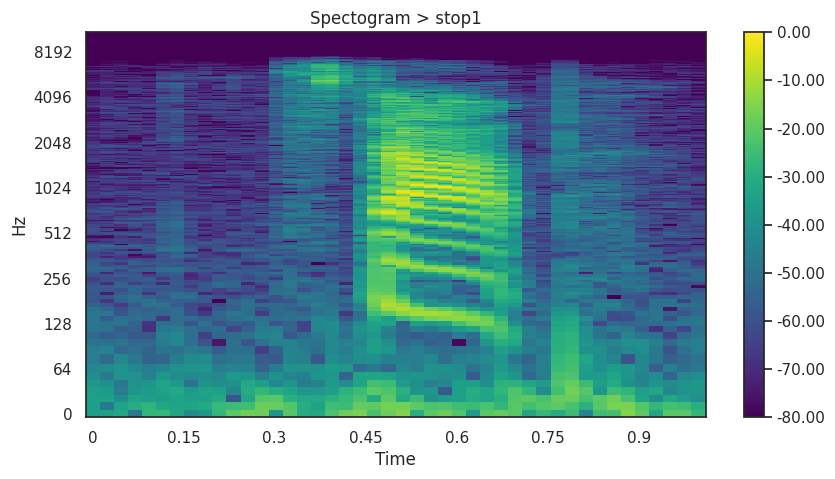

In [ ]:
display_wave("/content/drive/MyDrive/Colab Notebooks/short-speech/stop/0b40aa8e_nohash_0.wav","stop1")

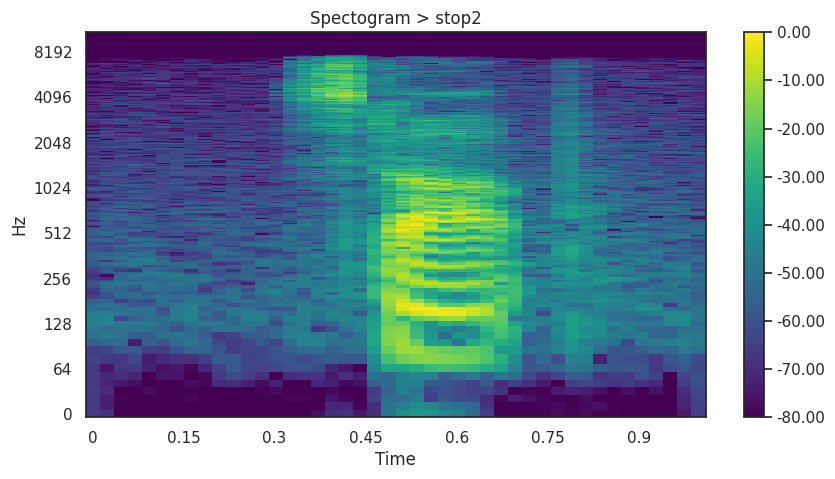

In [ ]:
display_wave("/content/drive/MyDrive/Colab Notebooks/short-speech/stop/0c2d2ffa_nohash_0.wav","stop2")